In [34]:
import kagglehub
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
path = kagglehub.dataset_download("zynicide/wine-reviews")

winemag_130k = pd.read_csv(path + "/winemag-data-130k-v2.csv", index_col='Unnamed: 0')

with open(path + "/winemag-data-130k-v2.json") as f:
    winemag_from_json = json.load(f)

Using Colab cache for faster access to the 'wine-reviews' dataset.


# winemag_130k

In [2]:
print(winemag_130k.shape)
print(winemag_130k.columns)
winemag_130k.head()

(129971, 13)
Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')


country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [35]:
l = len(winemag_130k)
columns = winemag_130k.columns

In [36]:
# 각 column의 Null 개수 확인
for column in columns:
    cnt_null = sum(winemag_130k[column].isnull())
    percentage = cnt_null / l
    print(f"null count of {column}: {cnt_null}, {percentage * 100:.2f}%")

null count of country: 63, 0.05%
null count of description: 0, 0.00%
null count of designation: 37465, 28.83%
null count of points: 0, 0.00%
null count of price: 8996, 6.92%
null count of province: 63, 0.05%
null count of region_1: 21247, 16.35%
null count of region_2: 79460, 61.14%
null count of taster_name: 26244, 20.19%
null count of taster_twitter_handle: 31213, 24.02%
null count of title: 0, 0.00%
null count of variety: 1, 0.00%
null count of winery: 0, 0.00%


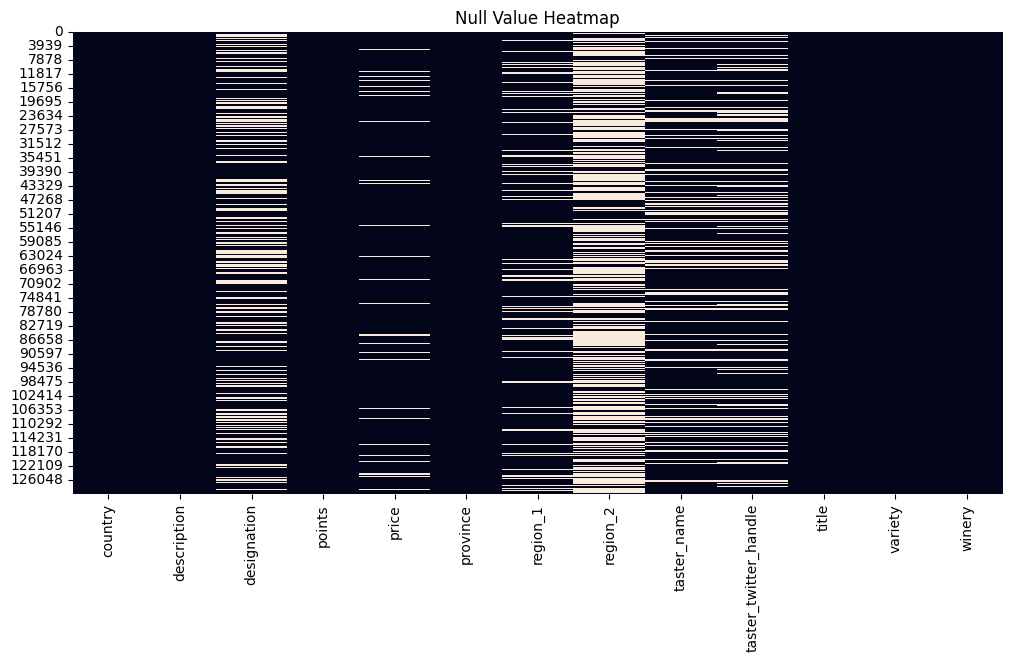

In [37]:
# Null heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(winemag_130k.isnull(), cbar=False)
plt.title("Null Value Heatmap")
plt.show()

In [38]:
# 필요 없는 column (taster_twitter_handle) drop
data = winemag_130k.drop("taster_twitter_handle", axis=1)
column = data.columns
print(data.shape)

(129971, 12)


# Price

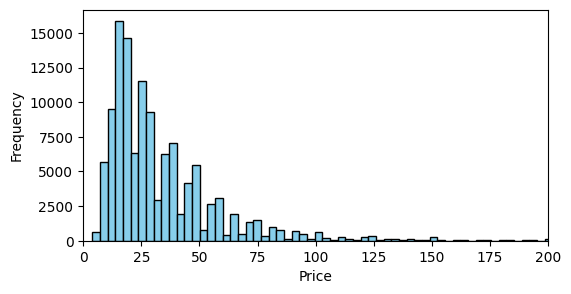

In [39]:
# price 분포 시각화
plt.figure(figsize=(6, 3))
plt.hist(data['price'].dropna(), bins=1_000, color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 200)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

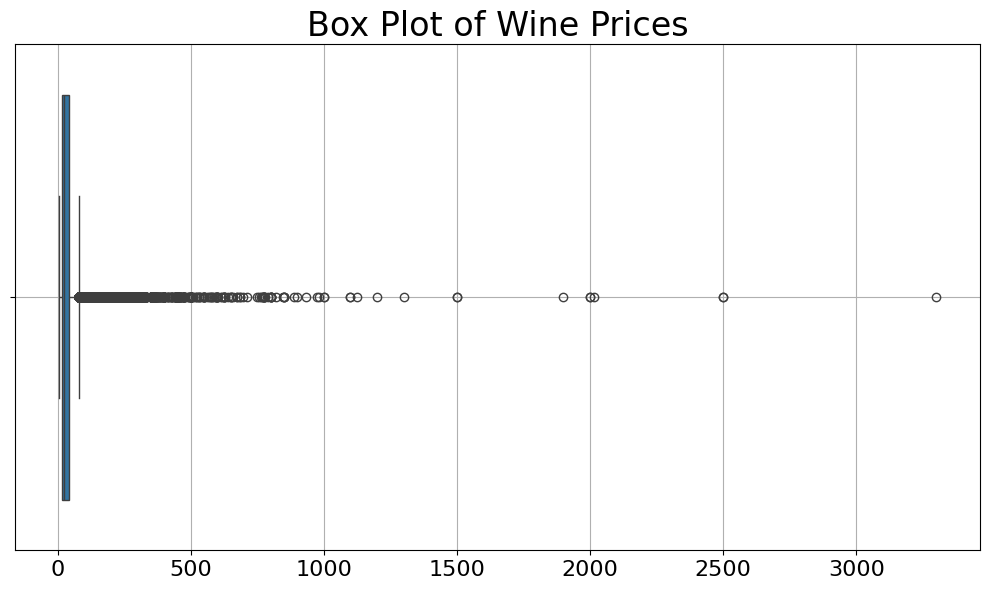

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'].dropna())
plt.title('Box Plot of Wine Prices', fontsize=24)
plt.xlabel("")
plt.xticks(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("prices_distribution.png")
plt.show()

In [41]:
percentile = data['price'].dropna().quantile(0.9999)

print(f"Price의 99.99% 이상이 분포하는 값의 최대치: {percentile}")

Price의 99.99% 이상이 분포하는 값의 최대치: 1100.0


In [42]:
# price 상한: 1000
data['price'] = data['price'].clip(upper=1000)

# Point

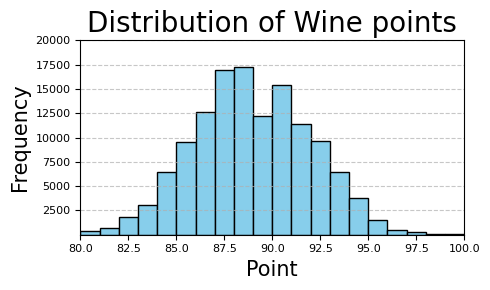

In [73]:
# point column 분석
plt.figure(figsize=(5, 3))
plt.hist(data['points'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Wine points', fontsize=20)
plt.xlabel("Point", fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xlim(80, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the origin tick labels

x_ticks = plt.xticks()[0]
y_ticks = plt.yticks()[0]
plt.xticks([t for t in x_ticks if t != 0], fontsize=8)
plt.yticks([t for t in y_ticks if t != 0], fontsize=8)
plt.tight_layout()
plt.savefig("points_distribution.png")

# Country

In [84]:
# 상위 N개 + others 묶어 시각화하는 함수
def topNPlusOthers(data, target, n):
    counts = data[target].value_counts()
    topN = counts.head(n)

    agg = pd.concat([
        topN,
        pd.Series({'Others': counts.iloc[n:].sum()})
    ])

    plt.figure(figsize=(10, 6))
    sns.barplot(x=agg.index, y=agg.values, palette='muted')
    plt.title(f"Distribution of {target}", fontsize=20)
    plt.xlabel("")
    plt.ylabel("Count", fontsize=16)
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(f"{target}_distribution.png")
    plt.show()

    return counts

In [82]:
# 모든 country 확인
unique_countries = data['country'].dropna().unique()
print(unique_countries)
print(f"\n총 나라 개수: {len(unique_countries)}")

['Italy' 'Portugal' 'US' 'Spain' 'France' 'Germany' 'Argentina' 'Chile'
 'Australia' 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Hungary'
 'Greece' 'Romania' 'Mexico' 'Canada' 'Turkey' 'Czech Republic' 'Slovenia'
 'Luxembourg' 'Croatia' 'Georgia' 'Uruguay' 'England' 'Lebanon' 'Serbia'
 'Brazil' 'Moldova' 'Morocco' 'Peru' 'India' 'Bulgaria' 'Cyprus' 'Armenia'
 'Switzerland' 'Bosnia and Herzegovina' 'Ukraine' 'Slovakia' 'Macedonia'
 'China' 'Egypt']

총 나라 개수: 43


/tmp/ipython-input-3904709538.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg.values, palette='muted')


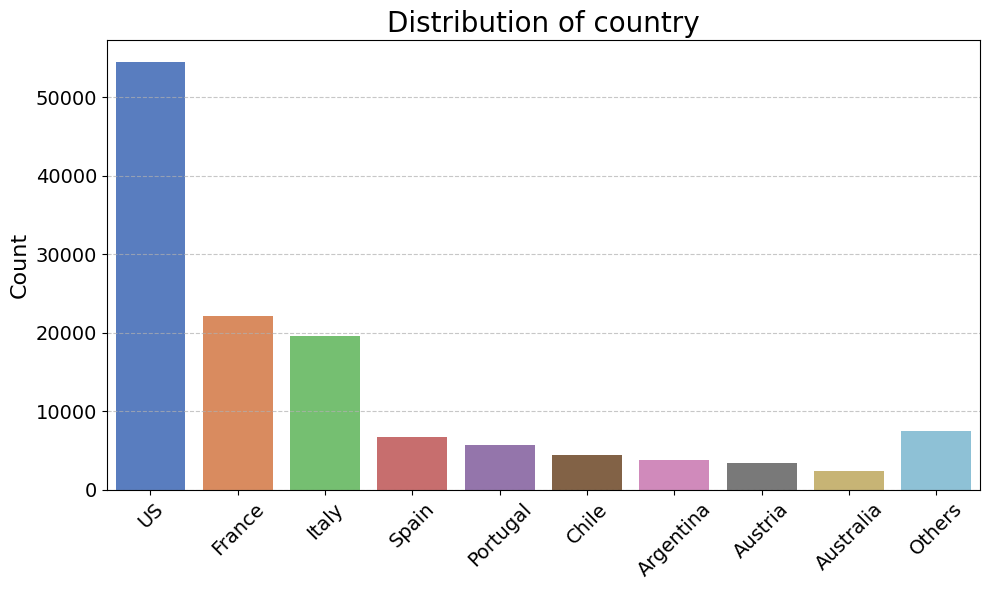

In [85]:
# 상위 9개 country + others 시각화
country_counts = topNPlusOthers(data, "country", 9)

# Winery

In [122]:
# 중복 winery 개수, 비율 확인
winery_counts = data['winery'].value_counts()
duplicate_wineries = winery_counts[winery_counts > 1].index.tolist()
top_10_wineries = winery_counts.head(10)
top_20_wineries = winery_counts.head(20)
print(duplicate_wineries)
print(f"\n중복되는 winery의 총 개수: {len(duplicate_wineries)}")
print(f"중복되는 winery의 비율: {winery_counts[winery_counts > 1].sum()/l * 100: .5f}%")
print(f"상위 10개 winery의 비율: {top_10_wineries.sum()/l * 100: .5f}%")
print(f"상위 20개 winery의 비율: {top_20_wineries.sum()/l * 100: .5f}%")

['Wines & Winemakers', 'Testarossa', 'DFJ Vinhos', 'Williams Selyem', 'Louis Latour', 'Georges Duboeuf', 'Chateau Ste. Michelle', 'Concha y Toro', 'Columbia Crest', 'Kendall-Jackson', 'Siduri', 'Gary Farrell', 'Lynmar', 'Albert Bichot', 'Montes', 'Trapiche', 'Jean-Luc and Paul Aegerter', 'Casa Santos Lima', 'Undurraga', 'Robert Mondavi', 'Santa Ema', 'Chanson Père et Fils', 'Fess Parker', 'V. Sattui', 'Iron Horse', 'Foxen', 'Louis Jadot', 'Maryhill', 'Chehalem', 'Feudi di San Gregorio', 'Domaine Zind-Humbrecht', 'Bründlmayer', 'Kunde', "D'Arenberg", 'Terre Rouge', 'Dutton-Goldfield', 'Errazuriz', 'Henri de Villamont', 'Kenwood', 'Cameron Hughes', 'J. Portugal Ramos', 'Seven Hills', 'Martin Ray', 'Dr. Loosen', 'Georges Vigouroux', 'Rodney Strong', 'Naggiar', 'Fenestra', 'Olivier Leflaive', 'Calera', 'Casca Wines', 'Joseph Drouhin', 'Santa Rita', 'J. Lohr', 'Lamoreaux Landing', 'Kirkland Signature', 'Rock Wall', 'Companhia das Quintas', 'Balletto', 'Waterbrook', 'Sineann', 'Novelty Hill'

/tmp/ipython-input-1474835397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


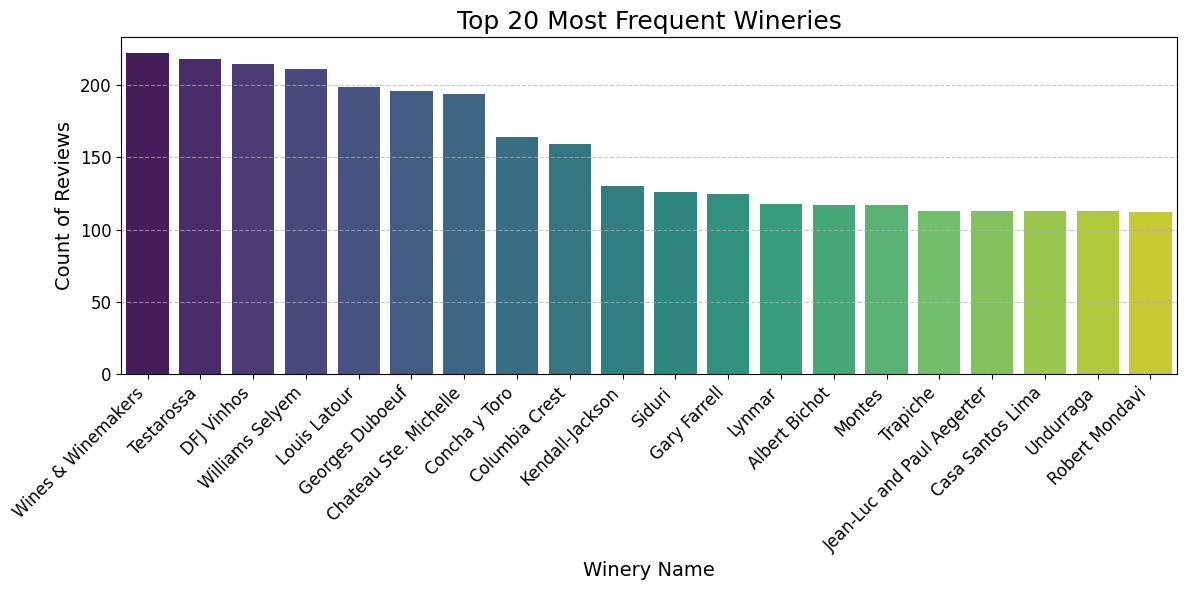

In [72]:
# 상위 20개 winery 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_20_wineries.index,
    y=top_20_wineries.values,
    palette='viridis'
)

plt.title("Top 20 Most Frequent Wineries", fontsize=18)
plt.xlabel("Winery Name", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3904709538.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg.values, palette='muted')


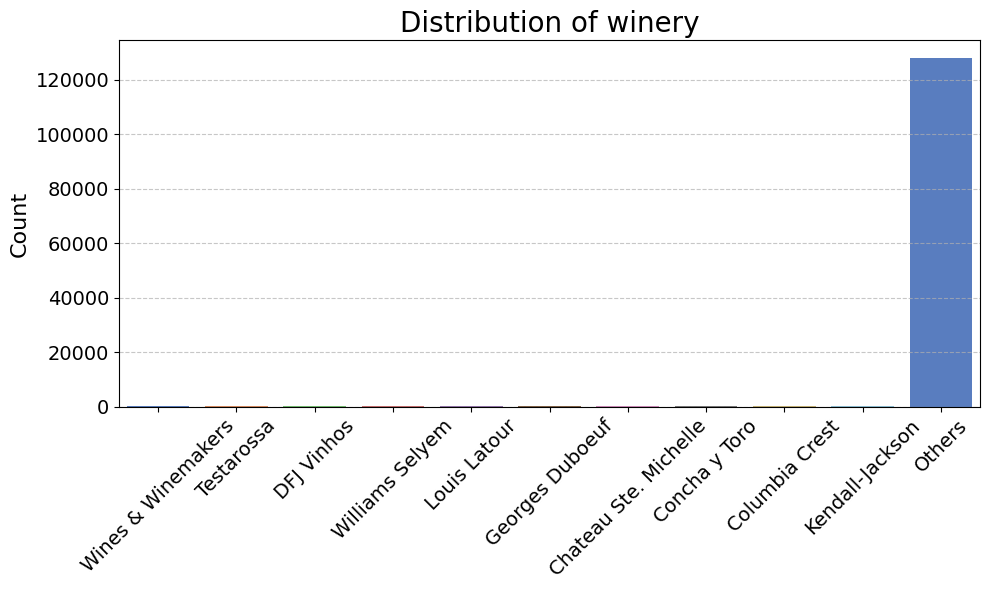

winery
Wines & Winemakers                222
Testarossa                        218
DFJ Vinhos                        215
Williams Selyem                   211
Louis Latour                      199
                                 ... 
The Winemaker's Loft                1
Domaine Coteau                      1
Château Jonc Blanc                  1
Conti Leopardi di San Leopardo      1
Philippe Prié                       1
Name: count, Length: 16757, dtype: int64

In [93]:
# 상위 10개 winery + others 시각화
topNPlusOthers(data, "winery", 10)

# Province

In [171]:
# 중복 province 개수, 비율 확인
province_counts = data['province'].dropna().value_counts()
duplicate_provinces = province_counts[province_counts > 1].index.tolist()
top_10_provinces = province_counts.head(10)
top_20_provinces = province_counts.head(20)
n = len(data['province'].dropna())

print(duplicate_provinces)
print(f"\n중복되는 province의 총 개수: {len(duplicate_provinces)}")
print(f"중복되는 province의 비율: {province_counts[province_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 province의 비율: {top_10_provinces.sum()/n * 100: .5f}%")
print(f"상위 20개 province의 비율: {top_20_provinces.sum()/n * 100: .5f}%")

['California', 'Washington', 'Bordeaux', 'Tuscany', 'Oregon', 'Burgundy', 'Northern Spain', 'Piedmont', 'Mendoza Province', 'Veneto', 'New York', 'Alsace', 'Northeastern Italy', 'Loire Valley', 'Sicily & Sardinia', 'Champagne', 'Southwest France', 'South Australia', 'Southern Italy', 'Provence', 'Douro', 'Central Italy', 'Catalonia', 'Rhône Valley', 'Beaujolais', 'Mosel', 'Alentejano', 'Colchagua Valley', 'Marlborough', 'Virginia', 'Tejo', 'France Other', 'Burgenland', 'Maipo Valley', 'Languedoc-Roussillon', 'Casablanca Valley', 'Port', 'Niederösterreich', 'Other', 'Lombardy', 'Lisboa', 'Central Spain', 'Maule Valley', 'Levante', 'Stellenbosch', 'Vinho Verde', 'Galicia', 'Kamptal', 'Central Valley', 'Wachau', 'Dão', 'Kremstal', 'Victoria', 'Rheingau', 'Western Australia', 'Western Cape', 'Rheinhessen', 'Galilee', 'Australia Other', 'Curicó Valley', 'Leyda Valley', 'Cachapoal Valley', 'Idaho', 'Andalucia', 'Pfalz', 'Alentejo', 'Bairrada', 'Central Otago', 'Rapel Valley', 'British Columb

/tmp/ipython-input-2134767652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


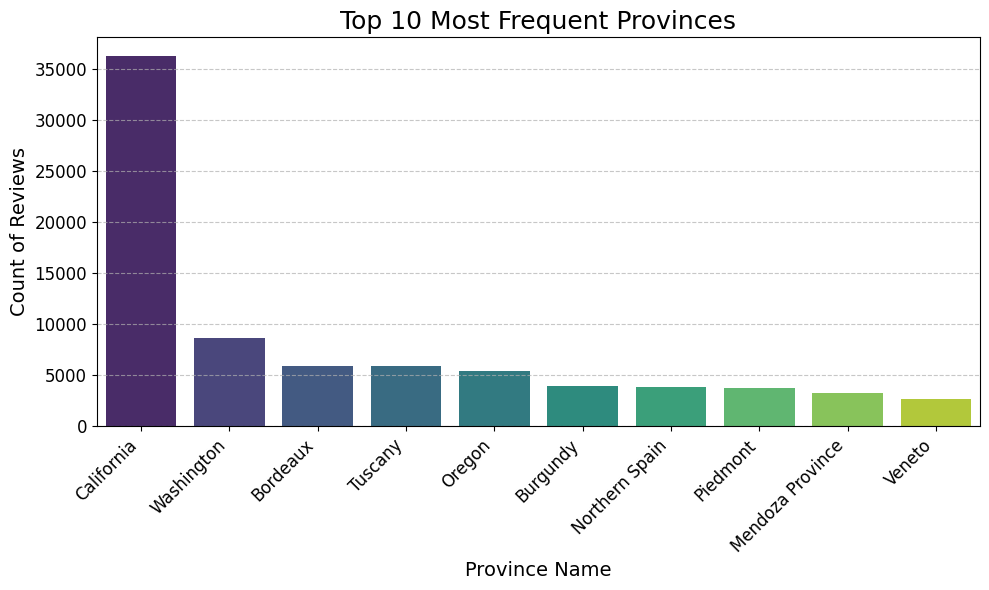

In [87]:
# 상위 10개 province 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_provinces.index,
    y=top_10_provinces.values,
    palette='viridis'
)

plt.title("Top 10 Most Frequent Provinces", fontsize=18)
plt.xlabel("Province Name", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3904709538.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg.values, palette='muted')


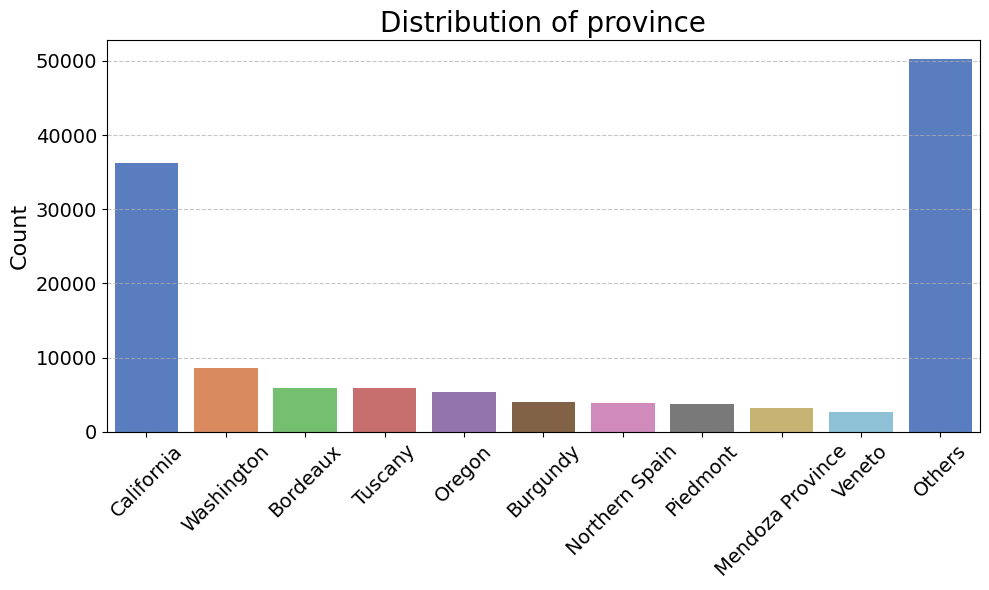

province
California           36247
Washington            8639
Bordeaux              5941
Tuscany               5897
Oregon                5373
                     ...  
Lesbos                   1
Neuchâtel                1
Dealurile Hușilor        1
Krk                      1
Urla-Thrace              1
Name: count, Length: 425, dtype: int64

In [94]:
# 상위 10개 province + others 시각화
topNPlusOthers(data, "province", 10)

# Region_1

In [172]:
# 중복 region_1 개수, 비율 확인
region1_counts = data['region_1'].dropna().value_counts()
duplicate_region1 = region1_counts[region1_counts > 1].index.tolist()
top_10_region1 = region1_counts.head(10)
top_20_region1 = region1_counts.head(20)
n = len(data['region_1'].dropna())

print(duplicate_region1)
print(f"\n중복되는 region_1의 총 개수: {len(duplicate_region1)}")
print(f"중복되는 region_1의 비율: {region1_counts[region1_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 region_1의 비율: {top_10_region1.sum()/n * 100: .5f}%")
print(f"상위 20개 region_1의 비율: {top_20_region1.sum()/n * 100: .5f}%")

['Napa Valley', 'Columbia Valley (WA)', 'Russian River Valley', 'California', 'Paso Robles', 'Mendoza', 'Willamette Valley', 'Alsace', 'Champagne', 'Barolo', 'Finger Lakes', 'Sonoma Coast', 'Brunello di Montalcino', 'Rioja', 'Sonoma County', 'Toscana', 'Walla Walla Valley (WA)', 'Chianti Classico', 'Santa Barbara County', 'Carneros', 'Yakima Valley', 'Sta. Rita Hills', 'Dry Creek Valley', 'Sicilia', 'Côtes de Provence', 'Santa Ynez Valley', 'Santa Lucia Highlands', 'Lodi', 'Barbaresco', 'Alexander Valley', 'Central Coast', 'Ribera del Duero', 'Red Mountain', 'Santa Maria Valley', 'Alto Adige', 'Sonoma Valley', 'Anderson Valley', 'North Fork of Long Island', 'Saint-Émilion', 'Chablis', 'Horse Heaven Hills', 'Virginia', 'Sancerre', 'Dundee Hills', 'Santa Cruz Mountains', 'Bordeaux', 'Cava', 'Cahors', 'Bordeaux Blanc', 'Oregon', 'Bordeaux Supérieur', 'Livermore Valley', 'Washington', 'Amarone della Valpolicella Classico', 'Rutherford', 'Edna Valley', 'Sierra Foothills', 'Amador County', '

/tmp/ipython-input-3065315020.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


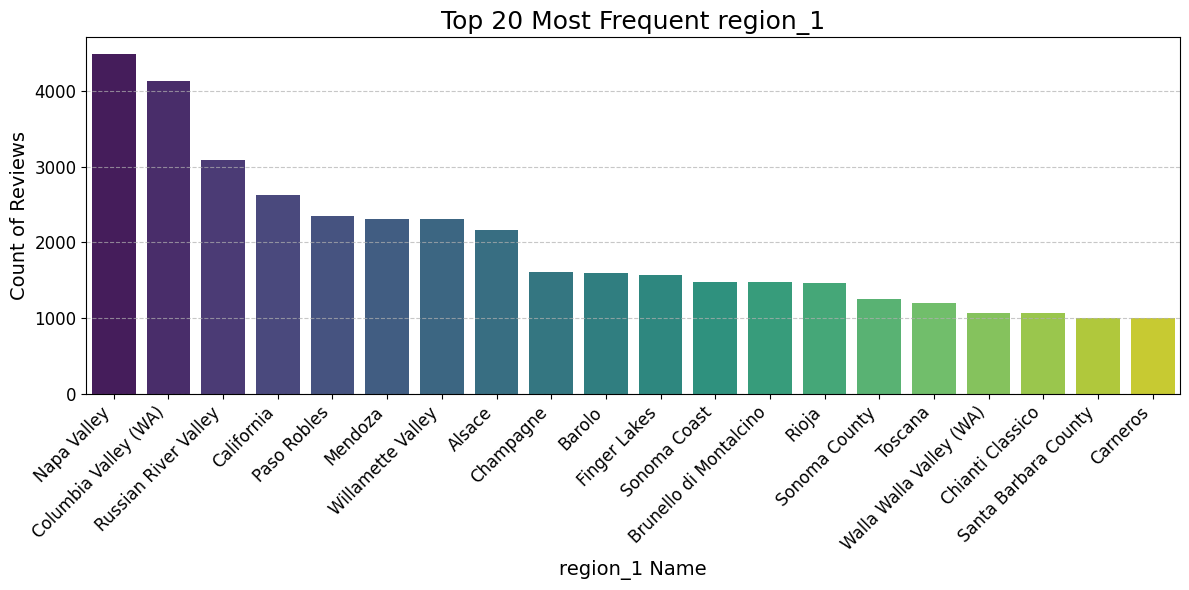

In [120]:
# 상위 20개 region_1 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_20_region1.index,
    y=top_20_region1.values,
    palette='viridis'
)

plt.title("Top 20 Most Frequent region_1", fontsize=18)
plt.xlabel("region_1 Name", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3904709538.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg.values, palette='muted')


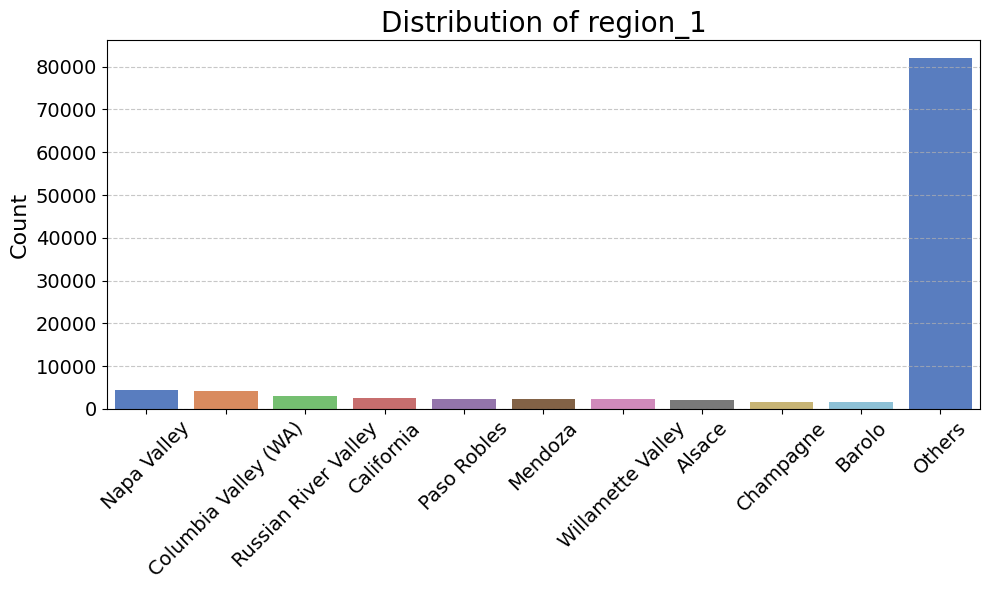

region_1
Napa Valley                       4480
Columbia Valley (WA)              4124
Russian River Valley              3091
California                        2629
Paso Robles                       2350
                                  ... 
Sonoma-Santa Barbara-Mendocino       1
Nasco di Cagliari                    1
Dolcetto d'Alba Superiore            1
Medrano                              1
Collioure                            1
Name: count, Length: 1229, dtype: int64

In [97]:
# 상위 10개 province + others 시각화
topNPlusOthers(data, "region_1", 10)

# Region_2

In [175]:
# 중복 region_2 개수, 비율 확인
region2_counts = data['region_2'].dropna().value_counts()
duplicate_region2 = region2_counts[region2_counts > 1].index.tolist()
top_10_region2 = region2_counts.head(10)
n = len(data['region_2'].dropna())

print(duplicate_region2)
print(f"\n중복되는 region_2의 총 개수: {len(duplicate_region2)}")
print(f"중복되는 region_2의 비율: {region2_counts[region2_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 region_2의 비율: {top_10_region2.sum()/n * 100: .5f}%")

['Central Coast', 'Sonoma', 'Columbia Valley', 'Napa', 'Willamette Valley', 'California Other', 'Finger Lakes', 'Sierra Foothills', 'Napa-Sonoma', 'Central Valley', 'Southern Oregon', 'Oregon Other', 'Long Island', 'North Coast', 'Washington Other', 'South Coast', 'New York Other']

중복되는 region_2의 총 개수: 17
중복되는 region_2의 비율:  100.00000%
상위 10개 region_2의 비율:  92.18982%


In [160]:
print(f"region_2 개수: {len(region2_counts)}")

region_2 개수: 17


/tmp/ipython-input-4048465613.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


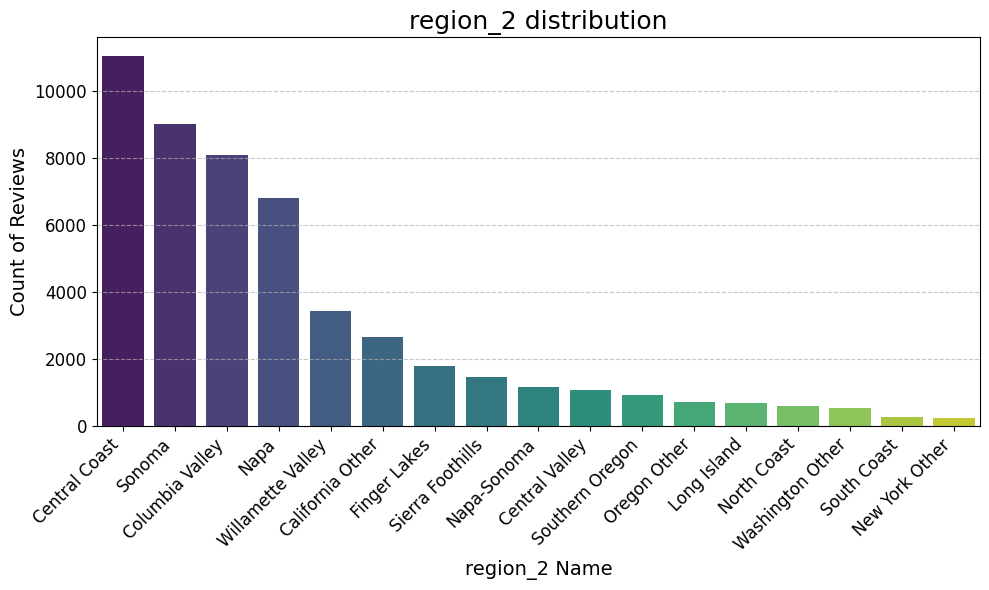

In [103]:
# region_2 시각화
region2 = region2_counts.head(17)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=region2.index,
    y=region2.values,
    palette='viridis'
)

plt.title("region_2 distribution", fontsize=18)
plt.xlabel("region_2 Name", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Taster_name

In [165]:
# 중복 taster 개수, 비율 확인
taster_counts = data['taster_name'].dropna().value_counts()
duplicate_taster = taster_counts[taster_counts > 1].index.tolist()
top_10_taster = taster_counts.head(10)
n = len(data['taster_name'].dropna())

print(duplicate_taster)
print(f"\n중복되는 taster의 총 개수: {len(duplicate_taster)}")
print(f"중복되는 tastser의 비율: {taster_counts[taster_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 tastser의 비율: {top_10_taster.sum()/n * 100: .5f}%")

['Roger Voss', 'Michael Schachner', 'Kerin O’Keefe', 'Virginie Boone', 'Paul Gregutt', 'Matt Kettmann', 'Joe Czerwinski', 'Sean P. Sullivan', 'Anna Lee C. Iijima', 'Jim Gordon', 'Anne Krebiehl\xa0MW', 'Lauren Buzzeo', 'Susan Kostrzewa', 'Mike DeSimone', 'Jeff Jenssen', 'Alexander Peartree', 'Carrie Dykes', 'Fiona Adams', 'Christina Pickard']

중복되는 taster의 총 개수: 19
중복되는 tastser의 비율:  100.00000%
상위 10개 tastser의 비율:  92.09753%


In [159]:
print(f"taster_name 개수: {len(taster_counts)}")

taster_name 개수: 19


/tmp/ipython-input-200249438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


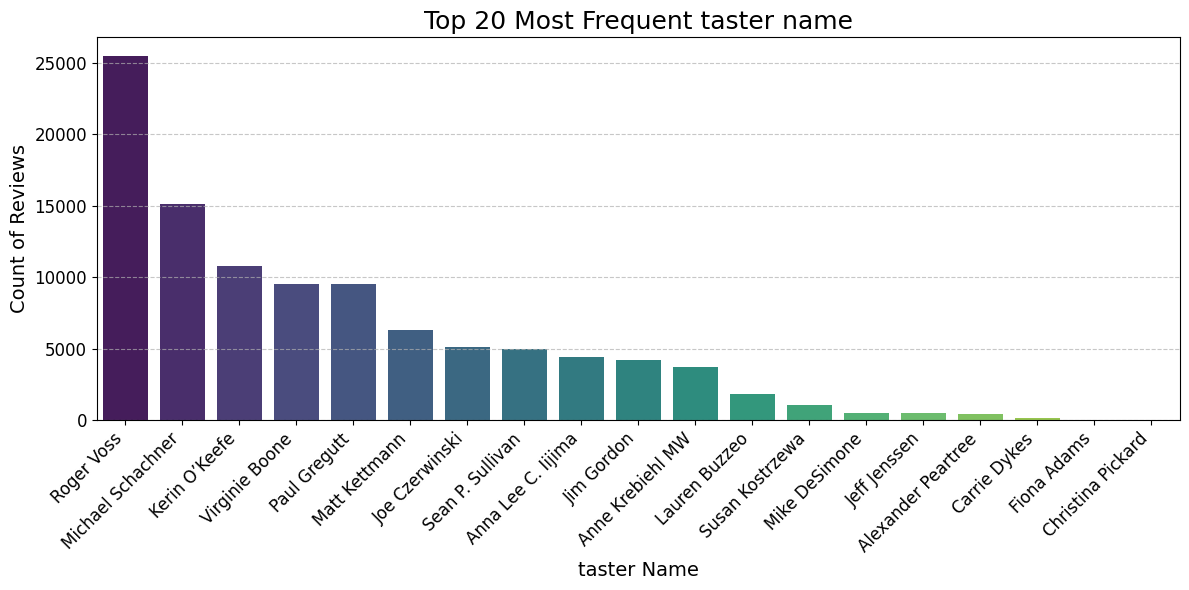

In [117]:
# 상위 20개 taster 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_20_taster.index,
    y=top_20_taster.values,
    palette='viridis'
)

plt.title("Top 20 Most Frequent taster name", fontsize=18)
plt.xlabel("taster Name", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3904709538.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg.values, palette='muted')


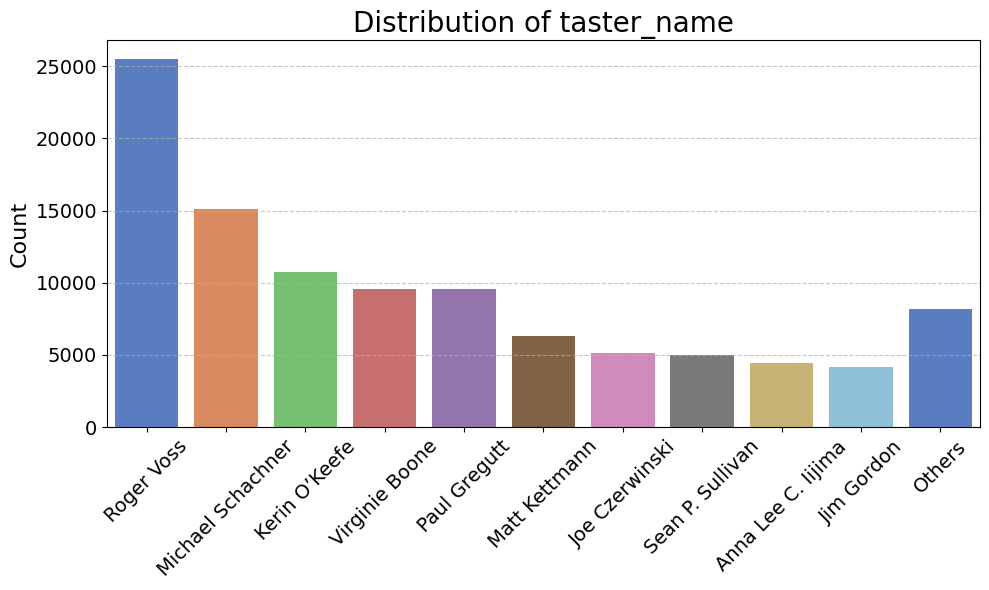

taster_name
Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: count, dtype: int64

In [109]:
# 상위 10개 taster + others 시각화
topNPlusOthers(data, "taster_name", 10)

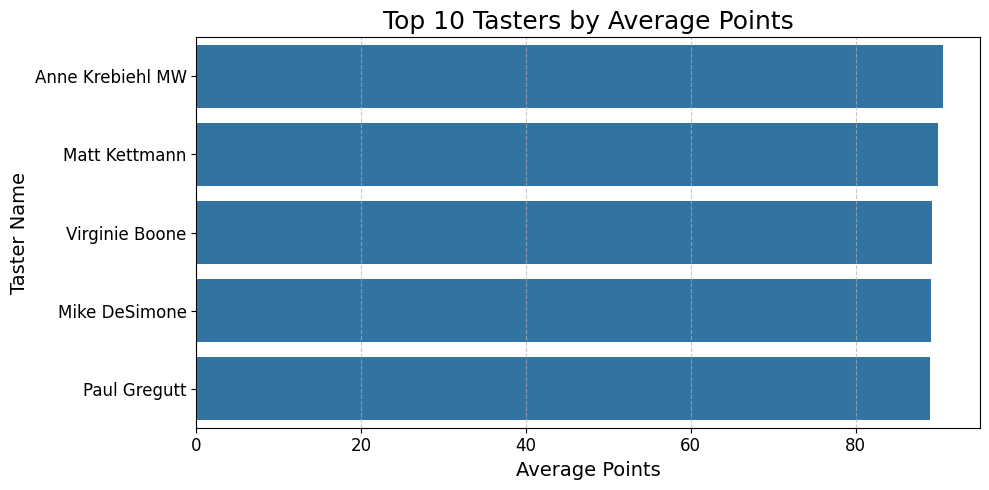

In [157]:
# Point를 후하게 준 상위 5명 시각화
taster_point_average = data.groupby('taster_name')['points'].mean().sort_values(ascending=False)
top_5_tasters_avg = taster_point_average.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=top_5_tasters_avg.values,
    y=top_5_tasters_avg.index
)
plt.title('Top 10 Tasters by Average Points', fontsize=18)
plt.xlabel('Average Points', fontsize=14)
plt.ylabel('Taster Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

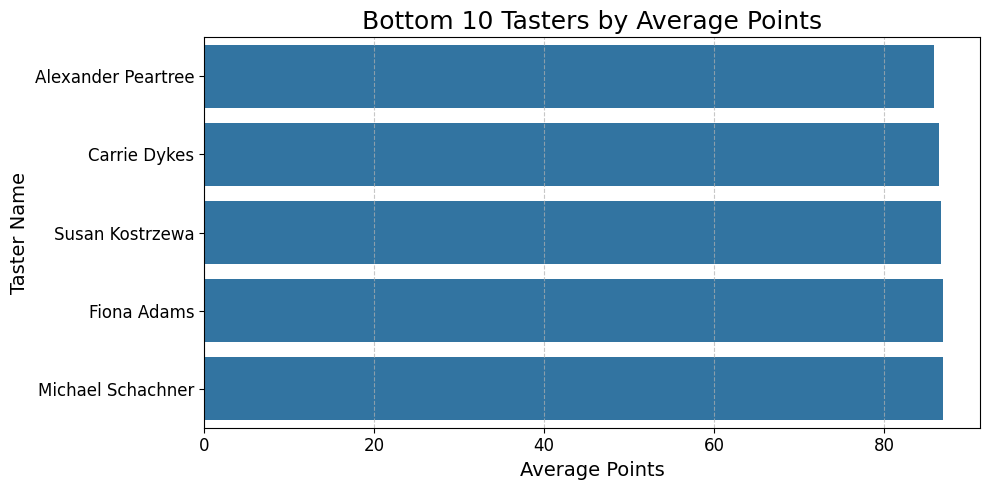

In [158]:
# Point를 박하게 준 상위 5명 시각화
taster_point_average = data.groupby('taster_name')['points'].mean().sort_values(ascending=True)
bot_5_tasters_avg = taster_point_average.head(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=bot_5_tasters_avg.values,
    y=bot_5_tasters_avg.index
)
plt.title('Bottom 10 Tasters by Average Points', fontsize=18)
plt.xlabel('Average Points', fontsize=14)
plt.ylabel('Taster Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Designation

In [167]:
# 중복 designation 개수, 비율 확인
designation_counts = data['designation'].dropna().value_counts()
duplicate_designation = designation_counts[designation_counts > 1].index.tolist()
top_10_designation = designation_counts.head(10)
top_20_designation = designation_counts.head(20)
n = len(data['designation'].dropna())

print(duplicate_designation)
print(f"\n중복되는 designation의 총 개수: {len(duplicate_designation)}")
print(f"중복되는 designation의 비율: {designation_counts[designation_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 designation의 비율: {top_10_designation.sum()/n * 100: .5f}%")
print(f"상위 20개 designation의 비율: {top_20_designation.sum()/n * 100: .5f}%")

['Reserve', 'Estate', 'Reserva', 'Riserva', 'Estate Grown', 'Brut', 'Dry', 'Barrel sample', 'Crianza', 'Estate Bottled', 'Vieilles Vignes', 'Brut Rosé', 'Gran Reserva', 'Barrel Sample', 'Tradition', 'Old Vine', 'Extra Dry', 'Rosé of', 'Rosé', 'Réserve', 'Single Vineyard', 'Vintage', 'Estate Reserve', 'Bien Nacido Vineyard', 'Late Harvest', 'Classic', 'Unoaked', 'Barrel Select', 'Late Bottled Vintage', 'Blanc de Blancs Brut', 'Old Vines', 'Stillwater Creek Vineyard', 'Barrel Fermented', 'Estate Vineyard', 'Cuvée Prestige', 'Signature', 'Grand Reserve', 'Blanc de Blancs', 'Tinto', 'Private Reserve', 'Collection', 'Semi-Dry', 'Prestige', "Vintner's Reserve", 'Limited Release', 'Roble', 'Dutton Ranch', 'Trocken', "Rosella's Vineyard", 'Stagecoach Vineyard', 'Sangiacomo Vineyard', 'Cannubi', 'Ciel du Cheval Vineyard', 'Durell Vineyard', "Proprietor's Reserve", 'Colheita', 'Premium', "Gap's Crown Vineyard", 'Bussia', 'Bacigalupi Vineyard', 'Paragon Vineyard', 'Rosé Brut', 'Boushey Vineyard',

/tmp/ipython-input-137937385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


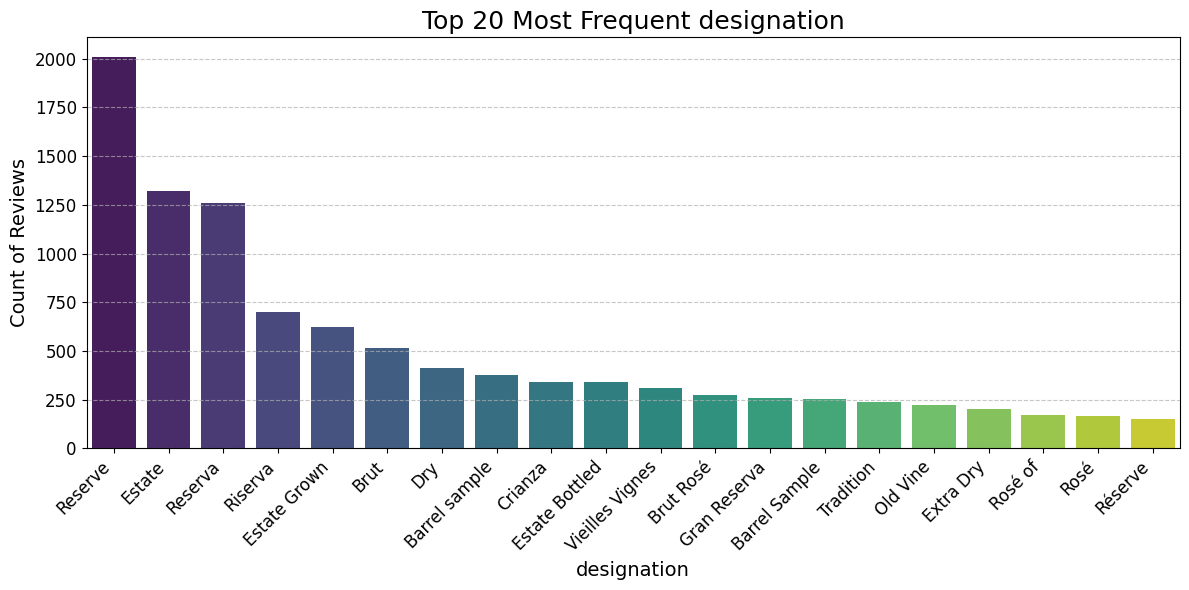

In [124]:
# 상위 20개 taster 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_20_designation.index,
    y=top_20_designation.values,
    palette='viridis'
)

plt.title("Top 20 Most Frequent designation", fontsize=18)
plt.xlabel("designation", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3904709538.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg.values, palette='muted')


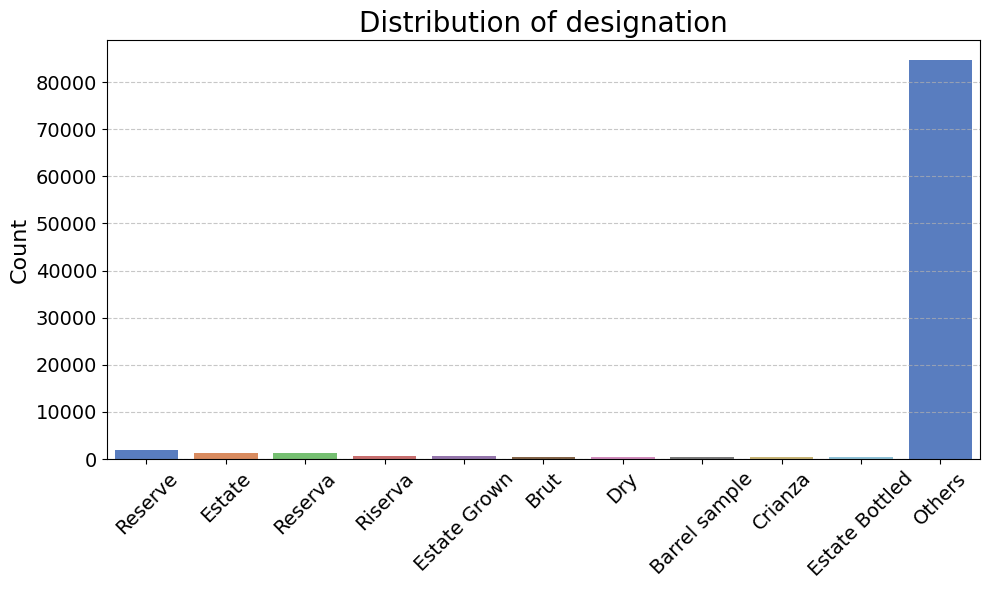

designation
Reserve                      2009
Estate                       1322
Reserva                      1259
Riserva                       698
Estate Grown                  621
                             ... 
Corte Menini                    1
La Belle de Mai                 1
One Doña Angeles Vineyard       1
One La Dolores Vineyard         1
L'Ancien                        1
Name: count, Length: 37979, dtype: int64

In [125]:
# 상위 10개 designation + others 시각화
topNPlusOthers(data, "designation", 10)

# Title

In [168]:
# 중복 title 개수, 비율 확인
title_counts = data['title'].dropna().value_counts()
duplicate_title = title_counts[title_counts > 1].index.tolist()
top_10_title = title_counts.head(10)
top_20_title = title_counts.head(20)
n = len(data['title'].dropna())

print(duplicate_title)
print(f"\n중복되는 title의 총 개수: {len(duplicate_title)}")
print(f"중복되는 title의 비율: {title_counts[title_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 title의 비율: {top_10_title.sum()/n * 100: .5f}%")
print(f"상위 20개 title의 비율: {top_20_title.sum()/n * 100: .5f}%")

['Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)', 'Korbel NV Brut Sparkling (California)', 'Segura Viudas NV Extra Dry Sparkling (Cava)', 'Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)', 'Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)', 'Ruinart NV Brut Rosé  (Champagne)', 'Mumm Napa NV Brut Prestige Sparkling (Napa Valley)', 'Boizel NV Brut Réserve  (Champagne)', 'J Vineyards & Winery NV Brut Rosé Sparkling (Russian River Valley)', "Pierre Sparr NV Brut Réserve Sparkling (Crémant d'Alsace)", 'Korbel NV Sweet Rosé Sparkling (California)', 'Jacquart NV Brut Mosaïque  (Champagne)', 'Bailly-Lapierre NV Brut  (Crémant de Bourgogne)', 'J. Dumangin Fils NV Le Rosé Premier Cru Brut  (Champagne)', 'Heidsieck & Co Monopole NV Blue Top Brut  (Champagne)', 'Pommery NV Brut Royal  (Champagne)', 'Breathless NV Brut Sparkling (North Coast)', 'Roederer Estate NV Brut Rosé Sparkling (Anderson Valley)', 'Mailly Grand Cru NV Blanc de Noirs Brut Pinot Noir (Champagne)', 'Jean Lau

In [129]:
# title 중복 그룹 내 price의 고유값 개수가 1을 초과하는지 확인하는 함수
def filter_by_different_price(group):
    return group['price'].dropna().nunique() > 1

# title 중복 그룹 내 country의 고유값 개수가 1을 초과하는지 확인하는 함수
def filter_by_different_country(group):
    return group['country'].dropna().nunique() > 1

# title 중복 그룹 내 winery의 고유값 개수가 1을 초과하는지 확인하는 함수
def filter_by_different_winery(group):
    return group['winery'].dropna().nunique() > 1

# title 중복 그룹 내 province의 고유값 개수가 1을 초과하는지 확인하는 함수
def filter_by_different_province(group):
    return group['province'].dropna().nunique() > 1

# title 중복 그룹 내 designation의 고유값 개수가 1을 초과하는지 확인하는 함수
def filter_by_different_designation(group):
    return group['designation'].dropna().nunique() > 1

In [134]:
# title 같지만 price 다른 레코드 확인
data_dpc_title = data[data['title'].isin(duplicate_title)].copy()
different_price_same_title_data = (
    data_dpc_title.groupby('title')
    .filter(filter_by_different_price)
)
num_records = len(different_price_same_title_data)
num_unique_titles = different_price_same_title_data['title'].nunique()

print(f"Title은 같지만 Price는 다른 레코드 총 개수: {num_records}개")
print(f"해당 조건을 만족하는 고유 Title 개수: {num_unique_titles}개")

Title은 같지만 Price는 다른 레코드 총 개수: 1204개
해당 조건을 만족하는 고유 Title 개수: 473개


In [131]:
# title 같지만 country 다른 레코드 확인
different_country_same_title_data = (
    data_dpc_title.groupby('title')
    .filter(filter_by_different_country)
)
num_records = len(different_country_same_title_data)
num_unique_titles = different_country_same_title_data['title'].nunique()

print(f"Title은 같지만 Country는 다른 레코드 총 개수: {num_records}개")
print(f"해당 조건을 만족하는 고유 Title 개수: {num_unique_titles}개")

Title은 같지만 Country는 다른 레코드 총 개수: 0개
해당 조건을 만족하는 고유 Title 개수: 0개


In [132]:
# title 같지만 winery 다른 레코드 확인
different_winery_same_title_data = (
    data_dpc_title.groupby('title')
    .filter(filter_by_different_winery)
)
num_records = len(different_winery_same_title_data)
num_unique_titles = different_winery_same_title_data['title'].nunique()

print(f"Title은 같지만 Winery는 다른 레코드 총 개수: {num_records}개")
print(f"해당 조건을 만족하는 고유 Title 개수: {num_unique_titles}개")

Title은 같지만 Winery는 다른 레코드 총 개수: 0개
해당 조건을 만족하는 고유 Title 개수: 0개


In [133]:
# title 같지만 province 다른 레코드 확인
different_province_same_title_data = (
    data_dpc_title.groupby('title')
    .filter(filter_by_different_province)
)
num_records = len(different_province_same_title_data)
num_unique_titles = different_province_same_title_data['title'].nunique()

print(f"Title은 같지만 Province는 다른 레코드 총 개수: {num_records}개")
print(f"해당 조건을 만족하는 고유 Title 개수: {num_unique_titles}개")

Title은 같지만 Province는 다른 레코드 총 개수: 0개
해당 조건을 만족하는 고유 Title 개수: 0개


In [135]:
# title 같지만 designation 다른 레코드 확인
different_designation_same_title_data = (
    data_dpc_title.groupby('title')
    .filter(filter_by_different_designation)
)
num_records = len(different_designation_same_title_data)
num_unique_titles = different_designation_same_title_data['title'].nunique()

print(f"Title은 같지만 Designation는 다른 레코드 총 개수: {num_records}개")
print(f"해당 조건을 만족하는 고유 Title 개수: {num_unique_titles}개")

Title은 같지만 Designation는 다른 레코드 총 개수: 0개
해당 조건을 만족하는 고유 Title 개수: 0개


/tmp/ipython-input-3923338216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


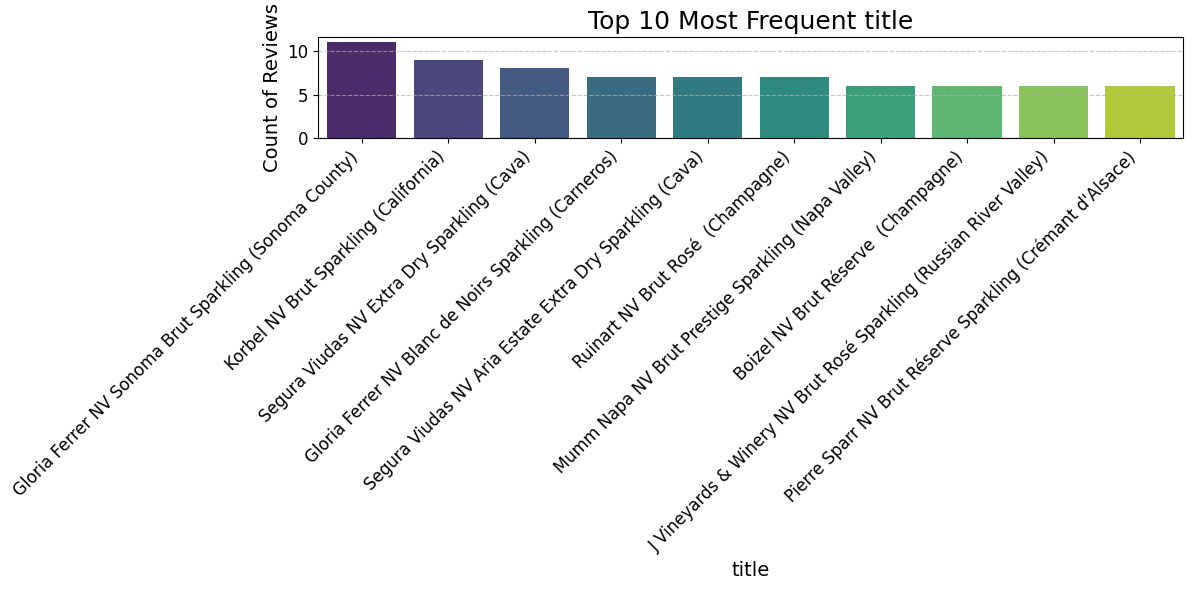

In [137]:
# 상위 10개 Title 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_title.index,
    y=top_10_title.values,
    palette='viridis'
)

plt.title("Top 10 Most Frequent title", fontsize=18)
plt.xlabel("title", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Variety

In [169]:
# 중복 variety 개수, 비율 확인
variety_counts = data['variety'].dropna().value_counts()
duplicate_variety = variety_counts[variety_counts > 1].index.tolist()
top_10_variety = variety_counts.head(10)
top_20_variety = variety_counts.head(20)
n = len(data['variety'].dropna())

print(duplicate_variety)
print(f"\n중복되는 variety의 총 개수: {len(duplicate_variety)}")
print(f"중복되는 variety의 비율: {variety_counts[variety_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 variety의 비율: {top_10_variety.sum()/n * 100: .5f}%")
print(f"상위 20개 variety의 비율: {top_20_variety.sum()/n * 100: .5f}%")

['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend', 'Riesling', 'Sauvignon Blanc', 'Syrah', 'Rosé', 'Merlot', 'Nebbiolo', 'Zinfandel', 'Sangiovese', 'Malbec', 'Portuguese Red', 'White Blend', 'Sparkling Blend', 'Tempranillo', 'Rhône-style Red Blend', 'Pinot Gris', 'Champagne Blend', 'Cabernet Franc', 'Grüner Veltliner', 'Portuguese White', 'Bordeaux-style White Blend', 'Pinot Grigio', 'Gamay', 'Gewürztraminer', 'Viognier', 'Shiraz', 'Petite Sirah', 'Sangiovese Grosso', 'Barbera', 'Glera', 'Port', 'Grenache', 'Corvina, Rondinella, Molinara', 'Chenin Blanc', 'Tempranillo Blend', 'Carmenère', 'Albariño', 'Pinot Blanc', 'Rhône-style White Blend', "Nero d'Avola", 'Aglianico', 'Moscato', 'Garnacha', 'Sauvignon', 'Verdejo', 'Melon', 'Garganega', 'Petit Verdot', 'Meritage', 'Torrontés', 'Prosecco', 'Blaufränkisch', 'Vermentino', 'Mourvèdre', 'Primitivo', 'Montepulciano', 'Zweigelt', 'Touriga Nacional', 'Pinot Nero', 'G-S-M', 'Dolcetto', 'Mencía', 'Tannat

/tmp/ipython-input-2823228400.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


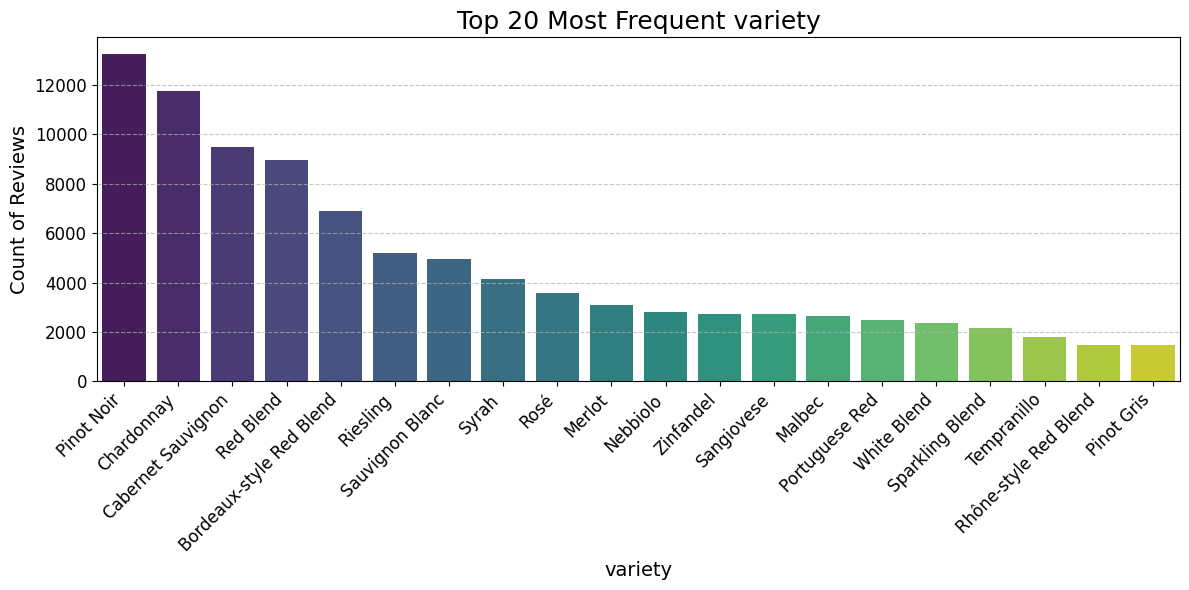

In [139]:
# 상위 20개 variety 시각화
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_20_variety.index,
    y=top_20_variety.values,
    palette='viridis'
)

plt.title("Top 20 Most Frequent variety", fontsize=18)
plt.xlabel("variety", fontsize=14)
plt.ylabel("Count of Reviews", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3904709538.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agg.index, y=agg.values, palette='muted')


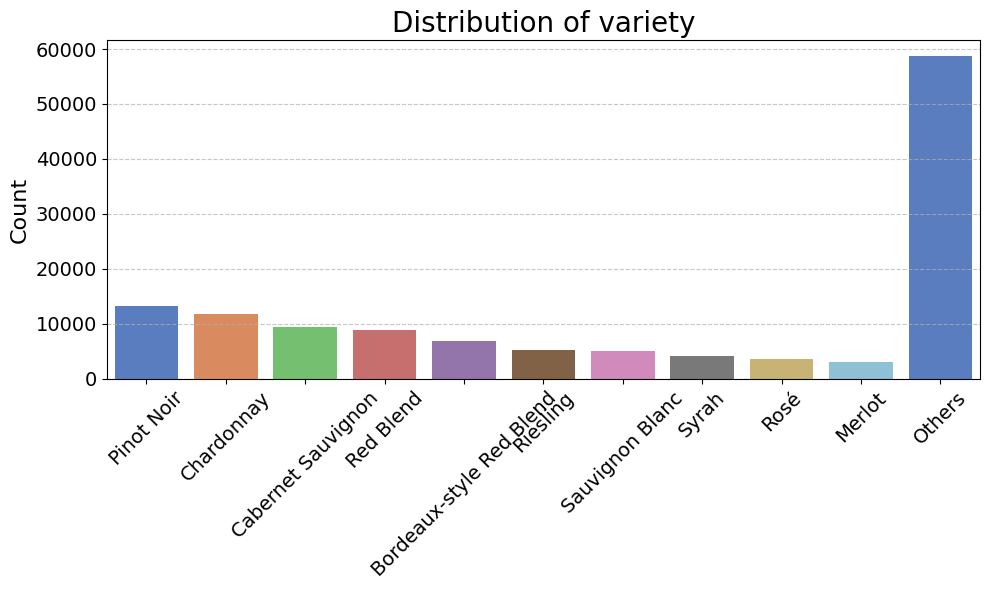

variety
Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Picapoll                        1
Blauburger                      1
Tinta Madeira                   1
Athiri                          1
Bobal-Cabernet Sauvignon        1
Name: count, Length: 707, dtype: int64

In [140]:
# 상위 10개 variety + others 시각화
topNPlusOthers(data, "variety", 10)

# Description

In [170]:
# 중복 variety 개수, 비율 확인
description_counts = data['description'].dropna().value_counts()
duplicate_description = description_counts[description_counts > 1].index.tolist()
top_10_description = description_counts.head(10)
top_20_description = description_counts.head(20)
n = len(data['description'].dropna())

print(duplicate_description)
print(f"\n중복되는 description의 총 개수: {len(duplicate_description)}")
print(f"중복되는 description의 비율: {description_counts[description_counts > 1].sum()/n * 100: .5f}%")
print(f"상위 10개 description의 비율: {top_10_description.sum()/n * 100: .5f}%")
print(f"상위 20개 description의 비율: {top_20_description.sum()/n * 100: .5f}%")

['Seductively tart in lemon pith, cranberry and pomegranate, this refreshing, light-bodied quaff is infinitely enjoyable, both on its own or at the table. It continues to expand on the palate into an increasing array of fresh flavors, finishing in cherry and orange.', 'Gravenstein apple, honeysuckle and jasmine aromas show on the relatively boisterous nose of this bottling from a large vineyard on Highway 46 east of Paso Robles. There is compellingly grippy texture to the sip, with ripe flavors of pear and honeydew melon. A salty acidity takes it to the next level.', 'Cigar box, café au lait, and dried tobacco aromas are followed by coffee and cherry flavors, with barrel spices lingering on the finish. The wood gets a bit out front but it still delivers enjoyment.', "Ripe plum, game, truffle, leather and menthol are some of the aromas you'll find on this earthy wine. The tightly wound palate offers dried black cherry, chopped sage, mint and roasted coffee bean alongside raspy tannins t

In [147]:
# 중복 상위 5개 description과 중복 횟수
print(description_counts.head(5))

description
Seductively tart in lemon pith, cranberry and pomegranate, this refreshing, light-bodied quaff is infinitely enjoyable, both on its own or at the table. It continues to expand on the palate into an increasing array of fresh flavors, finishing in cherry and orange.                                         3
Gravenstein apple, honeysuckle and jasmine aromas show on the relatively boisterous nose of this bottling from a large vineyard on Highway 46 east of Paso Robles. There is compellingly grippy texture to the sip, with ripe flavors of pear and honeydew melon. A salty acidity takes it to the next level.    3
Cigar box, café au lait, and dried tobacco aromas are followed by coffee and cherry flavors, with barrel spices lingering on the finish. The wood gets a bit out front but it still delivers enjoyment.                                                                                                          3
Ripe plum, game, truffle, leather and menthol are some of the aroma

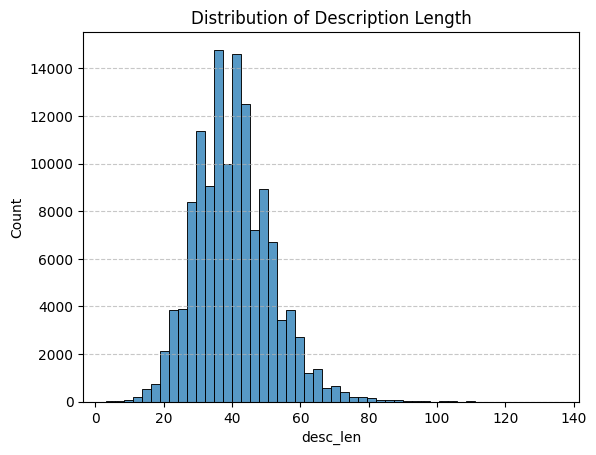

In [152]:
# description 텍스트 길이 분포 시각화
data["desc_len"] = data["description"].apply(lambda x: len(str(x).split()))
sns.histplot(data["desc_len"], bins=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Distribution of Description Length")

plt.show()